## Lineal Regression predicting ETH price
### Least squares

In [336]:
# Mudules
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('ggplot')

In [337]:
# Ethereum price on may 2018

In [338]:
may_train = np.array([np.arange(1, 15)]).T

In [339]:
may_test = np.array([np.arange(1, 16)]).T

In [340]:
eth_train = np.array([671.01, 687.99, 779.39, 785.52, 819.69, 793.79, 752.14, 754.0, 751.87, 723.39, 677.98, 682.69, 728.78, 727.41])

In [341]:
# Apply linear regression model 

In [342]:
regr = linear_model.LinearRegression()

In [343]:
regr.fit(may_train, eth_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [344]:
# Prediction
eth_predict = regr.predict(may_test)

Text(0.5,1,'Currency')

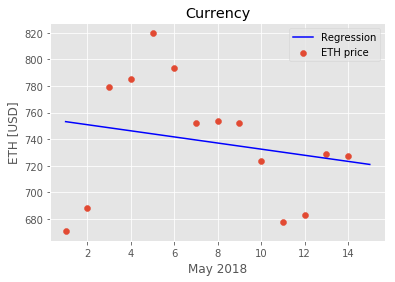

In [345]:
plt.scatter(may_train, eth_train, label='ETH price')
plt.plot(may_test, eth_predict, color = 'blue', label='Regression')

plt.legend()
plt.xlabel('May 2018')
plt.ylabel('ETH [USD]')
plt.title('Currency')

In [346]:
print('May size data train: {}\nEth size data train: {}\nMay size data test: {}\nEth size prediction: {}\n'.format(may_train.size, eth_train.size, eth_predict.size, may_test.size))

May size data train: 14
Eth size data train: 14
May size data test: 15
Eth size prediction: 15



In [347]:
print('Prediction for one day later: \n', eth_predict[-1])

Prediction for one day later: 
 721.0092307692308


In [348]:
eth_predict

array([753.212     , 750.9118022 , 748.6116044 , 746.31140659,
       744.01120879, 741.71101099, 739.41081319, 737.11061538,
       734.81041758, 732.51021978, 730.21002198, 727.90982418,
       725.60962637, 723.30942857, 721.00923077])

In [349]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-2.3001978]


In [350]:
mean_squared_error(may_test, eth_predict)

531805.5938364938

In [351]:
# Predict on day may 15
eth_predict_day = regr.predict(15)
print('Prediction for one day:\n', eth_predict_day)

Prediction for one day:
 [721.00923077]


In [352]:
# R2 Score
print("R2 Score:\n", regr.score(may_train, eth_train))

R2 Score:
 0.042285951998868865


# Polynomial interpolation predicting ETH price

## Testing with Ridge()
## Testing with LinearRegression() 

In [353]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [354]:
degree = 3
model_R = make_pipeline(PolynomialFeatures(degree), Ridge())
model_LR = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression(fit_intercept=False))
print(model_R,'\n', model_LR)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]) 
 Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])


In [355]:
model_R.fit(may_train, eth_train)
model_LR.fit(may_train, eth_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

In [356]:
model_predict_R = model_R.predict(may_test)
model_predict_LR = model_LR.predict(may_test)

Text(0.5,1,'Currency')

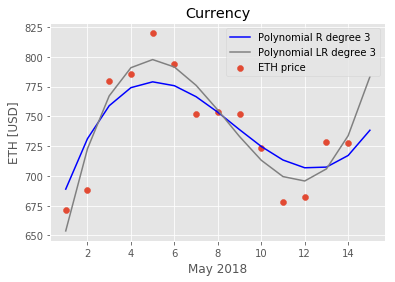

In [357]:
plt.scatter(may_train, eth_train, label='ETH price')
plt.plot(may_test, model_predict_R, color = 'blue', label='Polynomial R degree {}'.format(degree))
plt.plot(may_test, model_predict_LR, color = 'gray', label='Polynomial LR degree {}'.format(degree))

plt.legend(loc='best')
plt.xlabel('May 2018')
plt.ylabel('ETH [USD]')
plt.title('Currency')

In [358]:
print(model_predict_R.size, model_predict_LR.size)

15 15


In [359]:
print('Prediction for the next day, R:{} and LR:{}'.format(model_predict_R[-1], model_predict_LR[-1]))

Prediction for the next day, R:738.3169782540325 and LR:783.1847652347801


# Nearest Neighbors regression predicting ETH price


In [367]:
from sklearn import neighbors

In [374]:
knn_dis = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_uni = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [375]:
knn_dis.fit(may_train, eth_train)
knn_uni.fit(may_train, eth_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [376]:
knn_predict_dis = knn_dis.predict(may_test)
knn_predict_uni = knn_uni.predict(may_test)

Text(0,0.5,'ETH [USD]')

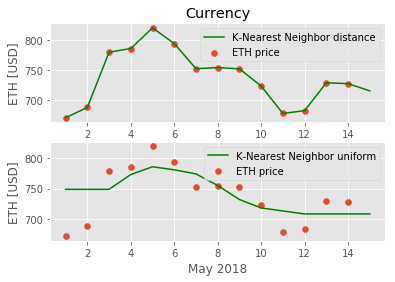

In [388]:
plt.subplot(2, 1, 1)
plt.scatter(may_train, eth_train, label='ETH price')
plt.plot(may_test, knn_predict_dis, color='green', label='K-Nearest Neighbor distance')

plt.legend(loc='best')
plt.xlabel('May 2018')
plt.ylabel('ETH [USD]')
plt.title('Currency')

plt.subplot(2, 1, 2)
plt.scatter(may_train, eth_train, label='ETH price')
plt.plot(may_test, knn_predict_uni, color='green', label='K-Nearest Neighbor uniform')

plt.legend(loc='best')
plt.xlabel('May 2018')
plt.ylabel('ETH [USD]')



In [379]:
print(knn_predict_dis.size, knn_predict_uni.size)

15 15


In [380]:
print('Prediction for the next day, knn_dis: {} and knn_uni {} '.format(knn_predict_dis[-1], knn_predict_uni[-1]))

Prediction for the next day, knn_dis: 715.4173722627736 and knn_uni 708.05 
